![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Exercises
## The Sakila Database

One of the best example databases out there is the <a href="https://dev.mysql.com/doc/sakila/en/">Sakila Database</a>, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 # why do we need to import sqlite3? For merging/joining the databases?

%matplotlib inline # why do we have to add inline here?

In [2]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

# How do you know what to join on without seeing the database in Jupyter?

In [3]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `film_rental_duration`?

In [6]:
# your code goes here

df['film_rental_duration'].mean()

4.935489902767389

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the most common rental duration?

Show a <b>bar plot</b> with all the durations.

Text(0, 0.5, 'Number of films')

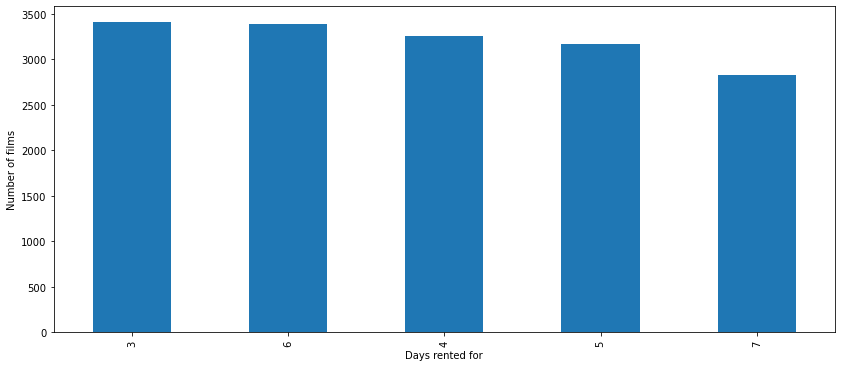

In [15]:
# your code goes here

film_dur = df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))
film_dur.set_xlabel('Days rented for')
film_dur.set_ylabel('Number of films')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the most common rental rate?

- Show a <b>pie plot</b> with all possible rental rates.
- Show a <b>bar plot</b> with all possible rental rates.
- Which plot you think fits the best in this case? Why?

<AxesSubplot:ylabel='film_rental_rate'>

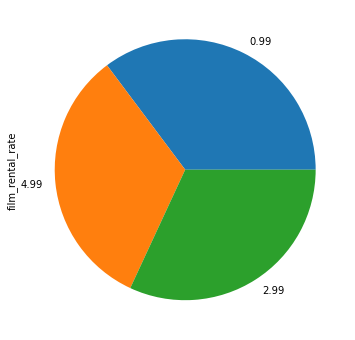

In [19]:
# your code goes here

df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(6,6))

<AxesSubplot:>

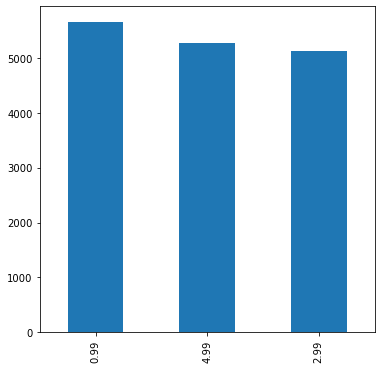

In [20]:
# your code goes here

df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(6,6))

# The bar plot is better because you can see the bin size for each rate. 
# Whereas the pie plot doesn't help you see the size clearly. Difficult for comparisons.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How is the replacement cost distributed?

- Show a <b>box plot</b> of the replacement costs.
- Show a <b>density plot</b> of the replacement costs.
- Add a red line on the <b>mean</b>.
- Add a green line on the median <b>median</b>.

<AxesSubplot:>

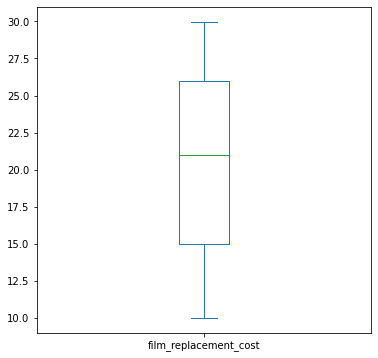

In [30]:
# your code goes here

df['film_replacement_cost'].plot(kind='box', figsize=(6,6))

# How do we interpret this box plot? 
# The median replacement cost is around USD 21.5
# Most replacement costs are between USD 15 and USD 25.
# It looks like a pretty evenly distributed range of costs.

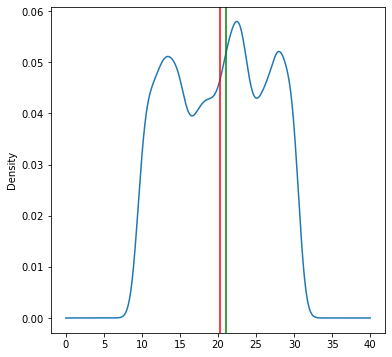

In [37]:
# your code goes here

cost_density = df['film_replacement_cost'].plot(kind='kde', figsize=(6,6))
cost_density.axvline(df['film_replacement_cost'].mean(), color='red')
cost_density.axvline(df['film_replacement_cost'].median(), color='green')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many films of each rating do we have?

- Show the raw count of each film rating.
- Show a <b>bar plot</b> with all possible film ratings.

In [39]:
# your code goes here

df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

Text(0.5, 0, 'Ratings categories')

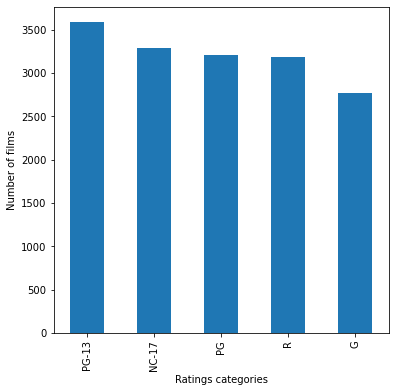

In [42]:
# your code goes here

ratings = df['film_rating'].value_counts().plot(kind='bar', figsize=(6,6))
ratings.set_ylabel('Number of films')
ratings.set_xlabel('Ratings categories')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Does the film replacement cost vary depending on film rating?

In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

- G (General Audiences): All Ages are Admitted.
- PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
- PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
- R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
- NC-17 (Adults Only): No One 17 and Under Admitted.

Show a <b>grouped box plot</b> per film rating with the film replacement costs.

<AxesSubplot:title={'center':'film_replacement_cost'}, xlabel='[film_rating]'>

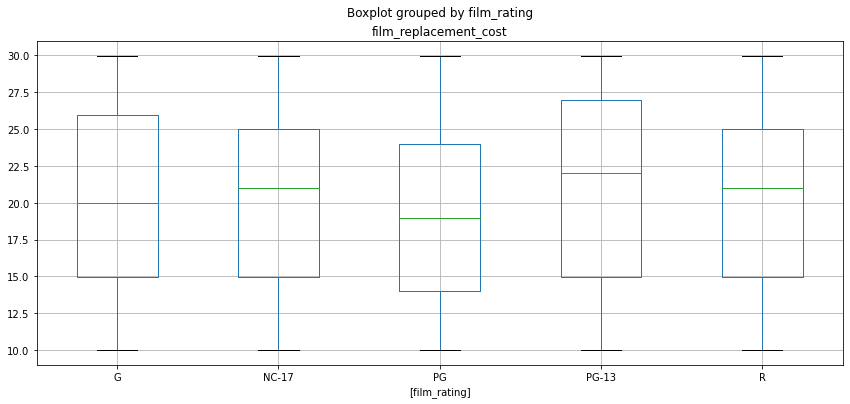

In [46]:
# your code goes here

df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

# The highest median film replacement cost is for PG-13 films. That means
# that these are probably the films that get lost/unreturned most. So the 
# penalty is extra high to make sure the films are returned.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `rental_days` column

This numeric column should have the count of days between `rental_date` and `return_date`.

In [89]:
# your code goes here

## Attempt 1 - Not totally successful.
## The output is a datetime object <m8[ns], which isn't an integer
# rental_days = df['return_date'] - df['rental_date']
# type(rental_days)

# df.insert(loc=2, column='rental_days', value=rental_days, allow_duplicates=True)
# df.head()

## Dropping the duplicate columns
# df = df.drop(columns=['rental_days'])

## CONVERTING the rental_days column to just days
## The code below doesn't seem to work, even though it's timedelta object
df['rental_days'].days

# df.head()


AttributeError: 'Series' object has no attribute 'days'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `rental_days`

- Calculate the mean of `rental_days`.
- Show a <b>density (KDE)</b> of `rental_days`.

In [80]:
# your code goes here

df['rental_days'].mean()
# 5 days seems to be the average a film is rented
# But there's a problem. It's not an integer. I can't make a kde graph
# with this data type

Timedelta('5 days 00:36:28.541706071')

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[timedelta64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

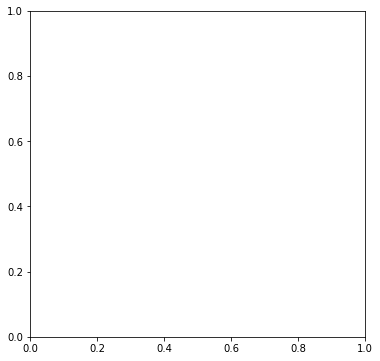

In [82]:
# your code goes here

df['rental_days'].plot(kind='density', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [104]:
# your code goes here

# daily_rate = df['film_rental_rate'] / df['film_rental_duration']
# df.insert(loc=9, column='film_daily_rental_rate', value=daily_rate)

df.head()

,rental_date,return_date,rental_days,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_daily_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,1 days 23:11:00,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,0.427143,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,3 days 20:46:00,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,0.427143,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,7 days 23:09:00,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,0.427143,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,9 days 02:39:00,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,0.165000,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,8 days 05:28:00,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,0.598000,29.99,NC-17


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `film_daily_rental_rate`

- Calculate the mean of `film_daily_rental_rate`.
- Show a <b>density (KDE)</b> of `film_daily_rental_rate`.

In [106]:
# your code goes here

df['film_daily_rental_rate'].mean()

0.6458262471655172

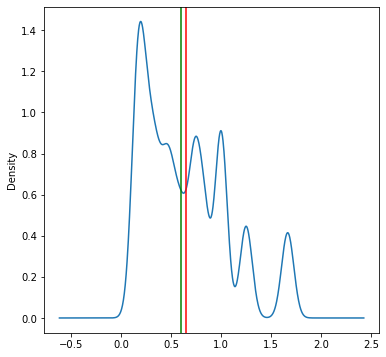

In [109]:
# your code goes here

rent_rate = df['film_daily_rental_rate'].plot(kind='kde', figsize=(6,6))
rent_rate.axvline(df['film_daily_rental_rate'].mean(), color='red')
rent_rate.axvline(df['film_daily_rental_rate'].median(), color='green')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the lowest daily rental rate

In [112]:
# your code goes here

df.sort_values(by='film_daily_rental_rate').head(10)

,rental_date,return_date,rental_days,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_daily_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,,,
14877,2005-08-22 03:39:56,2005-08-24 03:41:56,2 days 00:02:00,HERRERA,1,Lethbridge,DECEIVER BETRAYED,7,0.99,0.141429,22.99,NC-17
5734,2005-07-10 11:37:28,2005-07-16 11:10:28,5 days 23:33:00,BOWENS,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,0.141429,22.99,G
11899,2005-08-17 15:29:12,2005-08-24 17:41:12,7 days 02:12:00,PERRY,2,Woodridge,PRIMARY GLASS,7,0.99,0.141429,16.99,G
4210,2005-07-07 11:36:20,2005-07-16 12:38:20,9 days 01:02:00,WOFFORD,2,Woodridge,HOOK CHARIOTS,7,0.99,0.141429,23.99,G
7215,2005-07-27 09:24:00,2005-08-05 07:37:00,8 days 22:13:00,OLIVARES,2,Woodridge,MOON BUNCH,7,0.99,0.141429,20.99,PG
1268,2005-06-15 07:29:30,2005-06-23 12:36:30,8 days 05:07:00,BURNS,1,Lethbridge,SIEGE MADRE,7,0.99,0.141429,23.99,R
7229,2005-07-27 10:00:54,2005-07-28 13:58:54,1 days 03:58:00,LANE,2,Woodridge,DECEIVER BETRAYED,7,0.99,0.141429,22.99,NC-17
7231,2005-07-27 10:01:51,2005-08-05 13:38:51,9 days 03:37:00,LONG,2,Woodridge,GILBERT PELICAN,7,0.99,0.141429,13.99,G
7235,2005-07-27 10:09:30,2005-08-05 11:44:30,9 days 01:35:00,NGO,1,Lethbridge,EMPIRE MALKOVICH,7,0.99,0.141429,26.99,G


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the highest daily rental rate

In [113]:
# your code goes here
df.sort_values(by='film_daily_rental_rate', ascending=False).head(10)

,rental_date,return_date,rental_days,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_daily_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,,,
14763,2005-08-21 23:34:00,2005-08-31 03:58:00,9 days 04:24:00,GIBSON,1,Lethbridge,FLINTSTONES HAPPINESS,3,4.99,1.663333,11.99,PG-13
7055,2005-07-27 03:45:42,2005-07-30 05:11:42,3 days 01:26:00,GRANT,1,Lethbridge,VELVET TERMINATOR,3,4.99,1.663333,14.99,R
7014,2005-07-27 02:14:40,2005-08-03 00:32:40,6 days 22:18:00,ELY,2,Woodridge,CLERKS ANGELS,3,4.99,1.663333,15.99,G
1855,2005-06-17 00:54:58,2005-06-20 19:29:58,3 days 18:35:00,KRAUS,2,Woodridge,WIFE TURN,3,4.99,1.663333,27.99,NC-17
11511,2005-08-16 23:39:59,2005-08-18 18:04:59,1 days 18:25:00,SCHRADER,2,Woodridge,INNOCENT USUAL,3,4.99,1.663333,26.99,PG-13
1849,2005-06-17 00:13:19,2005-06-23 18:37:19,6 days 18:24:00,MENARD,1,Lethbridge,MAIDEN HOME,3,4.99,1.663333,9.99,PG
1844,2005-06-16 23:53:53,2005-06-22 02:19:53,5 days 02:26:00,GRESHAM,2,Woodridge,KISSING DOLLS,3,4.99,1.663333,9.99,R
11503,2005-08-16 23:10:34,2005-08-25 03:55:34,8 days 04:45:00,SEAL,2,Woodridge,FOOL MOCKINGBIRD,3,4.99,1.663333,24.99,PG
1835,2005-06-16 23:05:36,2005-06-19 04:46:36,2 days 05:41:00,REYNOLDS,1,Lethbridge,FLINTSTONES HAPPINESS,3,4.99,1.663333,11.99,PG-13


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Lethbridge city?

In [120]:
# your code goes here

df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

<AxesSubplot:>

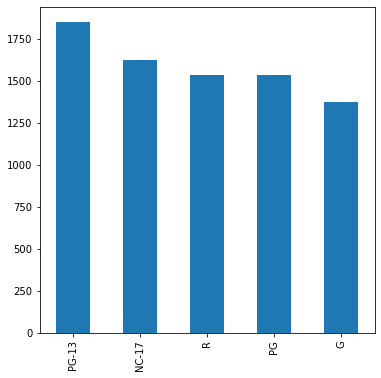

In [125]:
# your code goes here

df.loc[df['rental_store_city'] == 'Lethbridge'].film_rating.value_counts()

df.loc[df['rental_store_city'] == 'Lethbridge'].film_rating.value_counts().plot(kind='bar', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [129]:
# your code goes here

df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?

In [133]:
# your code goes here

df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].sort_values(by='film_rental_rate', ascending=False)

,rental_date,return_date,rental_days,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_daily_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,,,
5858,2005-07-10 18:00:07,2005-07-11 20:01:07,1 days 02:01:00,DOUGLAS,2,Woodridge,OPUS ICE,5,4.99,0.998000,21.99,R
8960,2005-07-30 03:36:31,2005-08-01 23:46:31,2 days 20:10:00,CLARY,2,Woodridge,BOOGIE AMELIE,6,4.99,0.831667,11.99,R
14411,2005-08-21 10:54:57,2005-08-22 13:17:57,1 days 02:23:00,CORNWELL,2,Woodridge,INNOCENT USUAL,3,4.99,1.663333,26.99,PG-13
4415,2005-07-07 22:01:43,2005-07-13 03:09:43,5 days 05:08:00,WAGGONER,2,Woodridge,FELLOWSHIP AUTUMN,6,4.99,0.831667,9.99,NC-17
14410,2005-08-21 10:54:49,2005-08-26 08:28:49,4 days 21:34:00,AUSTIN,2,Woodridge,CONVERSATION DOWNHILL,4,4.99,1.247500,14.99,R
...,...,...,...,...,...,...,...,...,...,...,...,...
7789,2005-07-28 07:22:07,2005-08-06 10:47:07,9 days 03:25:00,MOTLEY,2,Woodridge,NEWSIES STORY,4,0.99,0.247500,25.99,G
7792,2005-07-28 07:24:02,2005-08-04 11:13:02,7 days 03:49:00,DEAN,2,Woodridge,SNOWMAN ROLLERCOASTER,3,0.99,0.330000,27.99,G
7797,2005-07-28 07:41:07,2005-07-31 04:13:07,2 days 20:32:00,TRUONG,2,Woodridge,TREATMENT JEKYLL,3,0.99,0.330000,19.99,PG


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)